## Daten

In den angehängten Daten finden Sie Daten zur Bundestagswahl 2021, die vom Bundeswahlleiter als offene Daten zur Verfügung gestellt werden ([Quelle](https://www.bundeswahlleiter.de/bundestagswahlen/2021/ergebnisse/opendata.html)).

* Die Datei `btw21_gebiete_utf8.csv` enthält Informationen über die verschiedenen Gebiete, insbesondere die Wahlkreise, in Deutschland. 
* Die Datei `btw21_strukturdaten.csv` enthält Strukturdaten zu den einzelnen Wahlkreisen. 
* Die Datei `kerg2.csv` enthält das Ergebnis der Wahl für jeden Wahlkreis. 

Weitere Informationen entnehmen Sie bitte der Datendokumentation auf der Website. 

## Aufgaben

### 1. Daten laden

1. Laden Sie die Daten aus allen Dateien. Kopfzeilen in der Datei mit allgemeinen Informationen können ignoriert werden. 
2. Führen Sie für jede Datei eine einfache Plausibilitätsprüfung durch, um sicherzustellen, dass die Daten vollständig und korrekt geladen sind. Beschreiben Sie kurz, was Ihre Plausibilitätsprüfung testet und was Sie daraus schließen. 

<font color='red'>Beschränken Sie sich im Folgenden auf die Parteien 'CDU', 'CSU', 'SPD', 'AfD', 'FDP', 'DIE LINKE' und 'GRÜNE'.</font>

### 2. Graphische Darstellung 
Stellen sie die Ergebnisse der Bundestagswahl für die Zweitstimmen graphisch dar. Rechtfertigen sie die Wahl Ihrer Darstellung und führen Sie anhand der Darstellung eine weitere Plausibilitätsprüfung durch. 

### 3. Statistische Tests 
In diesem Teil gehen wir der Frage nach, ob die relative Verteilung der Erststimmengewinner auf Parteien von Bundesland zu Bundesland gleich ist (Hypothese). 
1. Erstellen sie eine Tabelle (pandas.DataFrame) mit den Parteien der Erststimmengewinner in jedem Wahlkreis. Die Tabelle sollte mindestens auch das Bundesland enthalten. 
2. Welche statistischen Datentyp haben die Spalten für die Partei und die Bundesländer?
3. Stellen sie die Tabelle graphisch so dar, dass sie visuell sehen könnten, wenn die Hypothese zutreffen würde. Rechtfertigen Sie die Wahl der graphischen Darstellung und formulieren Sie, wie die Graphik aussehen müsste, wenn die Hypothese zutreffen würde. 
4. Erstellen Sie aus Ihren Daten eine weitere Tabelle, die Bundesländer als Zeilen und Parteien als Spalten hat, und die in jeder Zelle die Anzahl der gewonnen Erststimmen aufweist. Führen Sie eine Plausibilitätsprüfung durch, um zu testen ob die Tabelle korrekt extrahiert wurde. Fügen Sie die Parteien CDU und CSU in einer Spalte zusammen. 
5. Formulieren Sie die Hypothese in statistischer Sprache.  Warum ist es dafür wichtig die Parteien CDU/CSU in eine Spalte zusammenzufügen. Hilfestellung: Welchen Zusammenhang sollten die Variablen `Partei` und `Bundesland` aufweisen/nicht aufweisen, wenn die Hypothese zuträfe?
6. Wählen sie aufgrund der Antwort einen statistischen Test aus, der die Hypothese mit der Tabelle aus Frage 4. testet (und führen Sie den Test aus). Rechtfertigen Sie die Wahl (siehe Antworten auf Frage 2. und 5.). Ist die Hypothese die Null-Hypothese oder die alternative Hypothese? Schreiben Sie einen Satz, was Sie aus dem p-Wert schließen können. 

### 4. Analyse anhand von Strukturdaten
In diesem Teil suchen wir nach wirtschaftlichen und gesellschaftlichen Prädiktoren für das Wahlergebnis. 
1. Erstellen sie eine Tabelle (pandas.DataFrame) mit Zweitstimmen-Prozent in jedem Wahlkreis. Fügen Sie der Tabelle ein weitere Spalte `konservativ` hinzu, die CDU, CSU, FDP, AfD als 1 (konservativ) labelt und DIE LINKE, SPD und GRÜNE als 0 (nicht konservativ). 
2. Extrahieren Sie aus dieser Tabelle eine Tabelle, die die Prozentpunkte für das label `0` und `1` in der Spalte `konservativ` aufsummiert und extrahieren sie diejenigen Zeilen, die die meisten Zweitstimmenanteile haben. Erweitern sie diese Tabelle mit den Strukturdaten aus `btw21_strukturdaten.csv`. Die Spalte `Fußnote` sollten Sie ignorieren. 
3. Trainieren Sie nun einen Logistic Regression (Achtung: Das ist ein Klassifizier) darauf aus den Strukturdaten vorherzusagen, ob mehrheitlich konservativ oder nicht konservativ gewählt wurde (Spalte aus 1.). Normalisieren sie Ihre Daten indem Sie den Mittelwert abziehen und durch die Standardabweichung teilen. Führen sie eine Hyperparameterselektion durch. Rechtfertigen Sie warum Ihr Parameterbereich angemessen ist. Testen Sie die Vorhersagegüte angemessen.  
4. Stellen Sie die Performance des Klassifizierers angemessen graphisch dar und quantifizieren Sie ob der Algorithmus besser vorhersagt als Chance-Level. Rechtfertigen Sie die Wahl der graphischen Darstellung und Ihrer Quantifizierungsmethode kurz. 
5. Quantifizieren Sie anhand der Gewichte Ihrer Klassifizierer welche 10 Spalten aus den Strukturdaten die Klassifizierung am meisten beeinflußen. Stellen sie das Ergebnis graphisch dar und beschreiben sie es kurz welche Faktoren einen positiven Einfluß auf konservatives Wahlverhalten haben. 
6. Quantifizieren Sie welche Vorhersagekraft die 10 Spalten alleine hätten und vergleichen sie das Ergebnis graphisch mit der Klassifizierungsperformance auf dem Datensatz, der allen Spalten enthält. 
7. Diskutieren Sie kurz, was an der Herangehensweise über Klassifierung der prozentualen Mehrheit problematisch sein könnte und schlagen Sie eine alternative Herangehensweise vor. Diskutieren Sie kurz, worin ein Problem in der Beschränkung auf einige Parteien liegen könnte?


### Aufgabe 1

In [1]:
# Imports:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
import matplotlib.lines as mlines

In [2]:
# The first dataset loaded, I've also skipped the unnecessary rows from the start to have a lighter dataset
df_wahl = pd.read_csv("kerg2.csv",delimiter=";", skiprows=9)

# The sanity check + data cleaning starts here:
df_wahl.info()  # We can clearly see that the "Bemerkung" column has 0 non-null values so we are going to drop it"
df_wahl = df_wahl.drop("Bemerkung",axis=1)

# One more aspect that is not as expected is the fact that the "Prozent" columns are of type "object". We would like to parse them as floats
df_wahl['Prozent'] = df_wahl['Prozent'].str.replace(',','.').astype(float)
df_wahl['DiffProzentPkt'] = df_wahl['DiffProzentPkt'].astype(str)
df_wahl['DiffProzentPkt'] = df_wahl['DiffProzentPkt'].str.replace(',','.').astype(float)
df_wahl['DiffProzent'] = df_wahl['DiffProzent'].astype(str)
df_wahl['DiffProzent'] = df_wahl['DiffProzent'].str.replace(',','.').astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18818 entries, 0 to 18817
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wahlart             18818 non-null  object 
 1   Wahltag             18818 non-null  object 
 2   Gebietsart          18818 non-null  object 
 3   Gebietsnummer       18818 non-null  int64  
 4   Gebietsname         18818 non-null  object 
 5   UegGebietsart       18715 non-null  object 
 6   UegGebietsnummer    18715 non-null  float64
 7   Gruppenart          18818 non-null  object 
 8   Gruppenname         18818 non-null  object 
 9   Gruppenreihenfolge  18818 non-null  int64  
 10  Stimme              18186 non-null  float64
 11  Anzahl              12970 non-null  float64
 12  Prozent             12654 non-null  object 
 13  VorpAnzahl          10569 non-null  float64
 14  VorpProzent         10253 non-null  object 
 15  DiffProzent         9223 non-null   object 
 16  Diff

In [3]:
df_wahl.shape #to make sure one more time that our data was correctly loaded and that is has the expected size

(18818, 17)

In [4]:
df_wahl.head()

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt
0,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wahlberechtigte,-4,NaN,61181072.0,NaN,61688485.0,NaN,-0.822541,NaN
1,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wählende,-3,NaN,46854508.0,76.583339,46976341.0,"76,150907",-0.259350,0.432432
2,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Ungültige,-2,1.0,492495.0,1.051116,586726.0,"1,248982",-16.060478,-0.197866
3,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Ungültige,-2,2.0,412485.0,0.880353,460849.0,"0,981024",-10.494544,-0.100671
4,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Gültige,-1,1.0,46362013.0,98.948884,46389615.0,"98,751018",-0.059500,0.197866


In [5]:
df_wahl.info() #one more time checking that the parsing process was successful
# Now he have the expected datatypes to work with 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18818 entries, 0 to 18817
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wahlart             18818 non-null  object 
 1   Wahltag             18818 non-null  object 
 2   Gebietsart          18818 non-null  object 
 3   Gebietsnummer       18818 non-null  int64  
 4   Gebietsname         18818 non-null  object 
 5   UegGebietsart       18715 non-null  object 
 6   UegGebietsnummer    18715 non-null  float64
 7   Gruppenart          18818 non-null  object 
 8   Gruppenname         18818 non-null  object 
 9   Gruppenreihenfolge  18818 non-null  int64  
 10  Stimme              18186 non-null  float64
 11  Anzahl              12970 non-null  float64
 12  Prozent             12654 non-null  float64
 13  VorpAnzahl          10569 non-null  float64
 14  VorpProzent         10253 non-null  object 
 15  DiffProzent         9223 non-null   float64
 16  Diff

In [6]:
# Since we don't really use VorpProzent in the following exercises I'll drop the columns as well
try:
    df_wahl = df_wahl.drop("VorpProzent",axis=1)
    df_wahl = df_wahl.drop("VorpAnzahl",axis=1)
except KeyError:
    pass    

In [7]:
# We are doing the same operations for the other 2 datasets
df_struct = pd.read_csv("btw21_strukturdaten.csv",delimiter=";",skiprows=8)
df_struct.head()
#df_struct

,Land,Wahlkreis-Nr.,Wahlkreis-Name,Gemeinden am 31.12.2019 (Anzahl),Fläche am 31.12.2019 (km²),Bevölkerung am 31.12.2019 - Insgesamt (in 1000),Bevölkerung am 31.12.2019 - Deutsche (in 1000),Bevölkerung am 31.12.2019 - Ausländer/-innen (%),Bevölkerungsdichte am 31.12.2019 (EW je km²),Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 - Geburtensaldo (je 1000 EW),...,"Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Übrige Dienstleister und ""ohne Angabe"" (%)",Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - insgesamt (je 1000 EW),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - nicht erwerbsfähige Hilfebedürftige (%),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - Ausländer/-innen (%),Arbeitslosenquote Februar 2021 - insgesamt,Arbeitslosenquote Februar 2021 - Männer,Arbeitslosenquote Februar 2021 - Frauen,Arbeitslosenquote Februar 2021 - 15 bis 24 Jahre,Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre,Fußnoten
0,Schleswig-Holstein,1,Flensburg – Schleswig,126,"2.124,3","291,3","266,9","8,4","137,1","-2,7",...,"36,7","76,8","26,1","28,2","7,0","7,7","6,2","5,9","7,6",NaN
1,Schleswig-Holstein,2,Nordfriesland – Dithmarschen Nord,197,"2.777,9","235,0","218,3","7,1","84,6","-5,2",...,"32,7","59,1","26,1","23,8","6,5","6,9","5,9","5,4","7,2",NaN
2,Schleswig-Holstein,3,Steinburg – Dithmarschen Süd,178,"2.000,0","221,0","206,6","6,5","110,5","-5,3",...,"32,0","70,6","26,3","29,3","6,4","6,8","6,1","7,0","6,4",NaN
3,Schleswig-Holstein,4,Rendsburg-Eckernförde,163,"2.165,4","252,1","238,2","5,5","116,4","-3,8",...,"33,9","52,8","29,6","33,2","4,8","5,2","4,3","4,7","5,2",NaN
4,Schleswig-Holstein,5,Kiel,3,"143,0","268,8","238,1","11,4","1879,2","-0,8",...,"38,9","125,2","26,8","35,1","8,4","9,2","7,4","5,1","8,4",NaN


In [8]:
df_struct.info() #Data Cleaning/Manipulation for this dataset is performed in exercise 4

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 52 columns):
 #   Column                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                --------------  ----- 
 0   Land                                                                                                  316 non-null    object
 1   Wahlkreis-Nr.                                                                                         316 non-null    int64 
 2   Wahlkreis-Name                                                                                        316 non-null    object
 3   Gemeinden am 31.12.2019 (Anzahl)                                                                      316 non-null    int64 
 4   Fläche am 31.12.2019 (km²)                                                                            316 non-

In [9]:
print(df_struct.shape) # just to see a little bit better the size
#We will drop the last column in exercise 4
df_struct.describe()

(316, 52)


,Wahlkreis-Nr.,Gemeinden am 31.12.2019 (Anzahl),Verfügbares Einkommen der privaten Haushalte 2018 (EUR je EW),Bruttoinlandsprodukt 2018 (EUR je EW)
count,316.000000,316.000000,316.000000,316.000000
mean,191.091772,102.613924,22738.965190,39353.500000
std,192.067038,639.700547,2560.403981,14256.927603
min,1.000000,1.000000,16450.000000,21403.000000
25%,79.750000,5.000000,20972.000000,30350.750000
50%,158.500000,25.000000,22557.500000,36083.000000
75%,237.250000,50.000000,24375.750000,42769.250000
max,999.000000,10799.000000,32766.000000,110283.000000


In [10]:
df_geb = pd.read_csv("btw21_gebiete_utf8.csv",delimiter=";", skiprows=7)
df_geb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gebietsart              318 non-null    object 
 1   Gebietsnummer           318 non-null    int64  
 2   Gebietsname/GebietText  318 non-null    object 
 3   Gebietsname_Abk         17 non-null     object 
 4   UegGebietsart           317 non-null    object 
 5   UegGebietsnummer        317 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 15.0+ KB


In [11]:
try:
    df_geb = df_geb.drop("Gebietsname_Abk",axis=1)
except KeyError:
    pass 

In [12]:
df_geb.head()

,Gebietsart,Gebietsnummer,Gebietsname/GebietText,UegGebietsart,UegGebietsnummer
0,BUND,99,Bundesgebiet,NaN,NaN
1,LAND,1,Schleswig-Holstein,BUND,99.0
2,LAND,2,Hamburg,BUND,99.0
3,LAND,3,Niedersachsen,BUND,99.0
4,LAND,4,Bremen,BUND,99.0


#### The sanity check performed above for all 3 datasets consists of analyzing the datatypes of the parameters in the dataset, size of the imported data, how many missing values do we have and comparing all with what was expected to import in the first place. Most of this information is given directly by the info function, but I've displayed the data in order to be sure that everything works just fine. 

### Aufgabe 2

In [13]:
# 'CSU','CDU' 'SPD', 'AfD', 'FDP', 'DIE LINKE' und 'GRÜNE'.
# Firstly we manipulate the data to obtain the second election and the political parties of interest
df1=df_wahl.loc[(df_wahl['Gruppenname']== 'SPD') & (df_wahl['Stimme'] == 2) ]
df2=df_wahl.loc[(df_wahl['Gruppenname']== 'CDU') & (df_wahl['Stimme'] == 2) ]
df3=df_wahl.loc[(df_wahl['Gruppenname']== 'CSU') & (df_wahl['Stimme'] == 2) ]
df4=df_wahl.loc[(df_wahl['Gruppenname']== 'AfD') & (df_wahl['Stimme'] == 2) ]
df5=df_wahl.loc[(df_wahl['Gruppenname']== 'GRÜNE') & (df_wahl['Stimme'] == 2) ]
df6=df_wahl.loc[(df_wahl['Gruppenname']== 'DIE LINKE') & (df_wahl['Stimme'] == 2) ]
df7=df_wahl.loc[(df_wahl['Gruppenname']== 'FDP') & (df_wahl['Stimme'] == 2) ]

frames = [df1, df2, df3, df4, df5, df6, df7]
df = pd.concat(frames) # in df we have the political parties and the rows for the second election
df.reset_index(drop=True,inplace=True) # I've also reseted the index
df.head() # quick check of the extracted data

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt
0,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,Partei,SPD,2,2.0,11955434.0,25.742707,25.327146,5.234742
1,BT,26.09.2021,Land,1,Schleswig-Holstein,BUND,99.0,Partei,SPD,2,2.0,494055.0,28.027450,23.666788,4.741401
2,BT,26.09.2021,Land,13,Mecklenburg-Vorpommern,BUND,99.0,Partei,SPD,4,2.0,267368.0,29.097827,91.402329,14.037181
3,BT,26.09.2021,Land,2,Hamburg,BUND,99.0,Partei,SPD,2,2.0,298342.0,29.669711,29.791788,6.169275
4,BT,26.09.2021,Land,3,Niedersachsen,BUND,99.0,Partei,SPD,2,2.0,1498500.0,33.129047,17.513559,5.688148


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897 entries, 0 to 1896
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wahlart             1897 non-null   object 
 1   Wahltag             1897 non-null   object 
 2   Gebietsart          1897 non-null   object 
 3   Gebietsnummer       1897 non-null   int64  
 4   Gebietsname         1897 non-null   object 
 5   UegGebietsart       1890 non-null   object 
 6   UegGebietsnummer    1890 non-null   float64
 7   Gruppenart          1897 non-null   object 
 8   Gruppenname         1897 non-null   object 
 9   Gruppenreihenfolge  1897 non-null   int64  
 10  Stimme              1897 non-null   float64
 11  Anzahl              1892 non-null   float64
 12  Prozent             1892 non-null   float64
 13  DiffProzent         1892 non-null   float64
 14  DiffProzentPkt      1897 non-null   float64
dtypes: float64(6), int64(2), object(7)
memory usage: 222.4+

<AxesSubplot:xlabel='Gruppenname', ylabel='Prozent'>

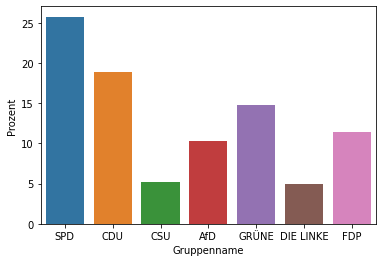

In [15]:
df_graph = df.loc[df["Gebietsart"]=="Bund"]
sns.barplot(data=df_graph,x="Gruppenname",y='Prozent')

In [16]:
df_graph.head() # we can clearly see that the percentages match the graph

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt
0,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,Partei,SPD,2,2.0,11955434.0,25.742707,25.327146,5.234742
316,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,Partei,CDU,1,2.0,8775471.0,18.895540,-29.501016,-7.864697
585,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,Partei,CSU,7,2.0,2402827.0,5.173821,-16.268702,-0.995496
633,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,Partei,AfD,3,2.0,4803902.0,10.343869,-18.274787,-2.293028
949,BT,26.09.2021,Bund,99,Bundesgebiet,NaN,NaN,Partei,GRÜNE,6,2.0,6852206.0,14.754323,64.779867,5.814506


#### Here I chose a bar plot because I've wanted to plots numeric values(Percentages) for levels of a categorical features(Political parties). This relationship is quantifiable in the best way through a bar plot. Moreover it respects all principles of design and organization of a good plot("honest and transparent portrayal of the data", no empty dimension etc.)

### Aufgabe 3
#### 3.1

In [17]:
# We want to see the winners of the first round of the elections taking into account just the mentioned political parties and to create a dataframe based on this
# Firstly we extract the political parties of interest for the first election

df11=df_wahl.loc[(df_wahl['Gruppenname']== 'SPD') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis") ]
df22=df_wahl.loc[(df_wahl['Gruppenname']== 'CDU') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis") ]
df33=df_wahl.loc[(df_wahl['Gruppenname']== 'CSU') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis")]
df44=df_wahl.loc[(df_wahl['Gruppenname']== 'AfD') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis")]
df55=df_wahl.loc[(df_wahl['Gruppenname']== 'GRÜNE') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis")]
df66=df_wahl.loc[(df_wahl['Gruppenname']== 'DIE LINKE') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis")]
df77=df_wahl.loc[(df_wahl['Gruppenname']== 'FDP') & (df_wahl['Stimme'] == 1) & (df_wahl["Gebietsart"]=="Wahlkreis") ]
frames2 = [df11, df22, df33, df44, df55, df66, df77]
df_erst = pd.concat(frames2)
df_erst = df_erst.sort_values(by='Gebietsnummer') # sort everything by name of the region  
df_erst.reset_index(drop=True,inplace=True)

In [18]:
df_erst.head()

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt
0,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,SPD,2,1.0,38927.0,21.798684,-18.410849,-6.214210
1,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,AfD,5,1.0,9768.0,5.469971,-7.701030,-0.743700
2,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,GRÜNE,4,1.0,50231.0,28.128797,180.447770,17.612587
3,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,DIE LINKE,6,1.0,6544.0,3.664567,-46.113307,-3.465625
4,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,FDP,3,1.0,12299.0,6.887302,10.334619,0.342486


In [19]:
# Here I've added also the Bundesland in the table
def land(row):  
    if row['UegGebietsnummer'] == 1.0 :
        return "Schleswig-Holstein"
    if row['UegGebietsnummer'] == 2.0:
        return "Hamburg"
    if row['UegGebietsnummer'] == 3.0:
        return "Niedersachsen"
    if row['UegGebietsnummer'] == 4.0:
        return "Bremen"
    if row['UegGebietsnummer'] == 5.0:
        return "Nordrhein-Westfalen"
    if row['UegGebietsnummer'] == 6.0:
        return "Hessen"
    if row['UegGebietsnummer'] == 7.0:
        return "Rheinland-Pfalz"
    if row['UegGebietsnummer'] == 8.0:
        return "Baden-Württemberg"
    if row['UegGebietsnummer'] == 9.0:
        return "Bayern"
    if row['UegGebietsnummer'] == 10.0:
        return "Saarland"
    if row['UegGebietsnummer'] == 11.0:
        return "Berlin"
    if row['UegGebietsnummer'] == 12.0:
        return "Brandenburg"
    if row['UegGebietsnummer'] == 13.0:
        return "Mecklenburg-Vorpommern"
    if row['UegGebietsnummer'] == 14.0:
        return "Sachsen"
    if row['UegGebietsnummer'] == 15.0:
        return "Sachsen-Anhalt"
    if row['UegGebietsnummer'] == 16.0:
        return "Thüringen"
df_erst["Land"] = df_erst.apply(lambda row: land(row), axis=1)       

In [20]:
df_erst.tail() #The table has also the Bundesland in the last column

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt,Land
1789,BT,26.09.2021,Wahlkreis,299,Homburg,LAND,10.0,Partei,GRÜNE,16,1.0,6826.0,4.889265,-4.236813,-0.084187,Saarland
1790,BT,26.09.2021,Wahlkreis,299,Homburg,LAND,10.0,Partei,CDU,1,1.0,36472.0,26.123829,-24.177789,-7.438594,Saarland
1791,BT,26.09.2021,Wahlkreis,299,Homburg,LAND,10.0,Partei,SPD,2,1.0,51091.0,36.594992,13.480076,5.181591,Saarland
1792,BT,26.09.2021,Wahlkreis,299,Homburg,LAND,10.0,Partei,DIE LINKE,3,1.0,7312.0,5.237372,-53.497838,-5.733804,Saarland
1793,BT,26.09.2021,Wahlkreis,299,Homburg,LAND,10.0,Partei,FDP,5,1.0,11015.0,7.889723,49.477541,2.748118,Saarland


In [21]:
# Now we see the winners of the first election in all regions of the country("Wahlkreis")
df_win=df_erst.loc[df_erst.groupby(["Gebietsnummer"])["Anzahl"].idxmax()]  #if we do idxmax for "Prozent" we will get the same result"
df_win.reset_index(drop=True,inplace=True)
df_win.sort_values(by="Gebietsnummer") # we observe that our operations on the data had great results, since the table below has the expected infos

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt,Land
0,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,GRÜNE,4,1.0,50231.0,28.128797,180.447770,17.612587,Schleswig-Holstein
1,BT,26.09.2021,Wahlkreis,2,Nordfriesland – Dithmarschen Nord,LAND,1.0,Partei,CDU,1,1.0,43745.0,30.367928,-29.733680,-14.778812,Schleswig-Holstein
2,BT,26.09.2021,Wahlkreis,3,Steinburg – Dithmarschen Süd,LAND,1.0,Partei,CDU,1,1.0,39431.0,29.212476,-28.061373,-12.666148,Schleswig-Holstein
3,BT,26.09.2021,Wahlkreis,4,Rendsburg-Eckernförde,LAND,1.0,Partei,SPD,2,1.0,49474.0,30.796141,9.771467,1.923993,Schleswig-Holstein
4,BT,26.09.2021,Wahlkreis,5,Kiel,LAND,1.0,Partei,SPD,2,1.0,45709.0,29.524726,-2.728182,-1.455831,Schleswig-Holstein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,BT,26.09.2021,Wahlkreis,295,Zollernalb – Sigmaringen,LAND,8.0,Partei,CDU,1,1.0,41106.0,30.137247,-33.371154,-14.831191,Baden-Württemberg
295,BT,26.09.2021,Wahlkreis,296,Saarbrücken,LAND,10.0,Partei,SPD,2,1.0,51749.0,36.858787,10.840045,4.726204,Saarland
296,BT,26.09.2021,Wahlkreis,297,Saarlouis,LAND,10.0,Partei,SPD,2,1.0,57354.0,36.736419,13.186770,4.668578,Saarland
297,BT,26.09.2021,Wahlkreis,298,St. Wendel,LAND,10.0,Partei,SPD,2,1.0,48135.0,35.140166,14.256213,4.781080,Saarland


#### 3.2 

#### The columns representing the political parties and the voting regions of the country are nominal data since they illustrate charachteristics/ categorical outcomes.

#### 3.3

<AxesSubplot:title={'center':'Prozent der gewonnenen Wahlkreise'}, ylabel='Land'>

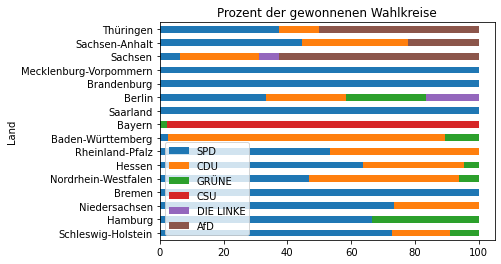

In [22]:
# The end result here should be a graph that tells the percentages pro political party of the regions("Wahlkreise") won in all of the Bundesländern
df_sh= df_win.loc[df_win["Land"] == "Schleswig-Holstein"]
l1 = df_sh['Gruppenname'].value_counts(normalize=True) * 100 #gives us percentages
neu = pd.DataFrame(l1).transpose()
neu["Land"] = "Schleswig-Holstein"
neu=neu.set_index("Land")
neu
# here I concatenate everytime the datasets, iterating through all of the Bundesländern 
list_land = ["Schleswig-Holstein","Hamburg","Niedersachsen","Bremen","Nordrhein-Westfalen","Hessen","Rheinland-Pfalz","Baden-Württemberg","Bayern","Saarland","Berlin","Brandenburg","Mecklenburg-Vorpommern","Sachsen","Sachsen-Anhalt","Thüringen"]
for i in list_land:
    df_loc = df_win.loc[df_win["Land"] == i]
    l_loc = df_loc['Gruppenname'].value_counts(normalize=True) * 100
    neu_loc = pd.DataFrame(l_loc).transpose()
    neu_loc["Land"]=i
    neu_loc = neu_loc.set_index("Land")
    result = pd.concat([neu, neu_loc],ignore_index=True, sort=False )
    neu=result
result = result.drop(0) 
result["Land"] = list_land
result=result.fillna(0) #all nans filled with 0(Land where a political party hasn't won anything has percent 0)
result.plot( x = 'Land',kind = 'barh',stacked = True,title = 'Prozent der gewonnenen Wahlkreise',mark_right = True)

In [23]:
result #tabel with percentages

,SPD,CDU,GRÜNE,CSU,DIE LINKE,AfD,Land
1,72.727273,18.181818,9.090909,0.000000,0.000000,0.000000,Schleswig-Holstein
2,66.666667,0.000000,33.333333,0.000000,0.000000,0.000000,Hamburg
3,73.333333,26.666667,0.000000,0.000000,0.000000,0.000000,Niedersachsen
4,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Bremen
5,46.875000,46.875000,6.250000,0.000000,0.000000,0.000000,Nordrhein-Westfalen
6,63.636364,31.818182,4.545455,0.000000,0.000000,0.000000,Hessen
7,53.333333,46.666667,0.000000,0.000000,0.000000,0.000000,Rheinland-Pfalz
8,2.631579,86.842105,10.526316,0.000000,0.000000,0.000000,Baden-Württemberg
9,0.000000,0.000000,2.173913,97.826087,0.000000,0.000000,Bayern
10,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Saarland


----

#### Here I've displayed the data in a stacked bar chart because I've wanted to emphasise comparisons between categories(percentages won by every political party in all Bundesländern). This was also very natural in this example, because we've worked with percentages, so the bars have the same height(in our case are horizontally dispalyed)

----

#### If the Hypothesis was true, than we would expect to have a stacked bar plot, where the political parties maintained their distribution in evey Land. Statistically speaking we wouldn't have seen a relationship between the Land and the political party. For example if Spd had 30% in one Land, we would expact to maintain this proportion for the other Bundesländern.

#### 3.4

In [24]:
# Here I did something similar as in the last part, but I've worked with count to get the number of "Wahlkreise" won by all political parties
df_sh
l3 = df_sh['Gruppenname'].value_counts()
neu_count = pd.DataFrame(l3).transpose()
neu_count["Land"]="Schleswig-Holstein"
neu_count = neu_count.set_index("Land")
# iteration in all Lands and than concatanate it to the initial "Schleswig-Holstein" dataframe
for i in list_land:
    df_loc= df_win.loc[df_win["Land"] == i]
    l_loc = df_loc['Gruppenname'].value_counts()
    neu_loc = pd.DataFrame(l_loc).transpose()
    neu_loc["Land"]=i
    neu_loc=neu_loc.set_index("Land")
    result2 = pd.concat([neu_count, neu_loc],ignore_index=True, sort=False ) #here is the concatenation
    neu_count=result2
result2=result2.drop(0) #dropped "Schleswig-Holstein" because it was duplicated
result2["Land"]=list_land

result2 = result2.set_index("Land") # here the index change is Happening to Land
result2 = result2.fillna(0) #for no region won we change from nan to 0

result2["CSU/CDU"]=result2["CDU"]+result2["CSU"] #add column with "CSU/CDU"
result2 = result2.drop("CDU", axis=1)
result2 = result2.drop("CSU", axis=1)
tot_row = result2.sum(axis=1)
tot_column = result2.sum(axis=0)
col_list = result2.columns

In [25]:
result2 #sanity check to see that the table has the wanted structure

,SPD,GRÜNE,DIE LINKE,AfD,CSU/CDU
Land,,,,,
Schleswig-Holstein,8.0,1.0,0.0,0.0,2.0
Hamburg,4.0,2.0,0.0,0.0,0.0
Niedersachsen,22.0,0.0,0.0,0.0,8.0
Bremen,2.0,0.0,0.0,0.0,0.0
Nordrhein-Westfalen,30.0,4.0,0.0,0.0,30.0
Hessen,14.0,1.0,0.0,0.0,7.0
Rheinland-Pfalz,8.0,0.0,0.0,0.0,7.0
Baden-Württemberg,1.0,4.0,0.0,0.0,33.0
Bayern,0.0,1.0,0.0,0.0,45.0


In [26]:
result2.info() #Percentages are all floats so we've got the expected result

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Schleswig-Holstein to Thüringen
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SPD        16 non-null     float64
 1   GRÜNE      16 non-null     float64
 2   DIE LINKE  16 non-null     float64
 3   AfD        16 non-null     float64
 4   CSU/CDU    16 non-null     float64
dtypes: float64(5)
memory usage: 768.0+ bytes


#### 3.5

####  The null hypothesis for this test is that there is no relationship between Land and political party(expected that percentages remain the same).



#### The alternative hypothesis is that there is a relationship between Bundesland and political party(for example that in Bayern CSU has won all "Wahlkreise"). 

#### Because CSU has only won in Bayern(see 4.3), it's easier(lower time complexity) and statistical significantly to conduct the the chi-squared test for nominal attributes, with one less attribute, since will be a column full of 0 and just one value in Bayern

---

#### 3.6

#### We are going to perform a chi-squared test

---

#### This statistical test was chosen on the grounds of working with nominal data + the given Hypothesis. In our case, the Hypothesis is the Null-Hypothesis(no relationship between Land and political party)

In [27]:
# added a row and a column on the table from 3.4 with the sum of the column/row 
result3 = result2
result3['tot'] = tot_row
result3 = result3.append(tot_column,ignore_index=True )

In [28]:
result3

,SPD,GRÜNE,DIE LINKE,AfD,CSU/CDU,tot
0,8.0,1.0,0.0,0.0,2.0,11.0
1,4.0,2.0,0.0,0.0,0.0,6.0
2,22.0,0.0,0.0,0.0,8.0,30.0
3,2.0,0.0,0.0,0.0,0.0,2.0
4,30.0,4.0,0.0,0.0,30.0,64.0
5,14.0,1.0,0.0,0.0,7.0,22.0
6,8.0,0.0,0.0,0.0,7.0,15.0
7,1.0,4.0,0.0,0.0,33.0,38.0
8,0.0,1.0,0.0,0.0,45.0,46.0
9,4.0,0.0,0.0,0.0,0.0,4.0


In [29]:
observed = result3.iloc[0:16,0:5]
expected =  np.outer(result3["tot"][0:16],result3.loc[16][0:5]) / 299 #calculating the expected value table
expected = pd.DataFrame(expected)
expected.columns = [col_list]
observed.columns = [col_list]

In [30]:
chi_squared = (((observed-expected)**2)/expected).sum().sum() #chi squared calculated with a double sum
print(chi_squared)
# Here we have 60 degrees of freedom (16-1)(5-1)
p_value1 = 1 - stats.chi2.cdf(x=90, df=60) #from a chi^2 value of 90 with our degrees of freedom(60) we have a p-value of 0.73
print(p_value1)
#for our chi^2 value (342.1791349087878) the p-value is so low that is almost surely 0 in statistical language
p_value2 = 1 - stats.chi2.cdf(x=chi_squared, df=60)
print(p_value2)

342.1791349087878
0.007337199297796526
0.0


#### We can clearly reject the Null Hypothesis

### Aufgabe 4

#### 4.1

In [31]:
# Function conserv divides the political parties in conservative and progressive
def conserv(row):  
    if (row['Gruppenname'] == "SPD" or row['Gruppenname'] == "GRÜNE" or row['Gruppenname'] =='DIE LINKE'):
        return 0
    else: 
        return 1
df["konservativ"] = df.apply(lambda row: conserv(row), axis=1) # lambda function that creates the column with conservative political parties 
df["Land"] = df.apply(lambda row: land(row), axis=1)  
df=df.loc[df["Gebietsart"]=="Wahlkreis"]
df=df.sort_values(by= "Gebietsnummer") # sort the data by the number of the voting region
df=df.reset_index(drop=True)

In [32]:
df.head()
# We can clearly see that we've added the konservativ column

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt,konservativ,Land
0,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,SPD,2,2.0,45508.0,25.476837,12.677033,1.783997,0,Schleswig-Holstein
1,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,AfD,5,2.0,10317.0,5.775787,-11.464859,-1.060220,1,Schleswig-Holstein
2,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,GRÜNE,4,2.0,33300.0,18.642407,49.300574,5.558196,0,Schleswig-Holstein
3,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,DIE LINKE,6,2.0,7475.0,4.184745,-46.614769,-4.029258,0,Schleswig-Holstein
4,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,FDP,3,2.0,19189.0,10.742617,1.234503,-0.376967,1,Schleswig-Holstein


In [33]:
df.info() #checking the data one more time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wahlart             1794 non-null   object 
 1   Wahltag             1794 non-null   object 
 2   Gebietsart          1794 non-null   object 
 3   Gebietsnummer       1794 non-null   int64  
 4   Gebietsname         1794 non-null   object 
 5   UegGebietsart       1794 non-null   object 
 6   UegGebietsnummer    1794 non-null   float64
 7   Gruppenart          1794 non-null   object 
 8   Gruppenname         1794 non-null   object 
 9   Gruppenreihenfolge  1794 non-null   int64  
 10  Stimme              1794 non-null   float64
 11  Anzahl              1790 non-null   float64
 12  Prozent             1790 non-null   float64
 13  DiffProzent         1790 non-null   float64
 14  DiffProzentPkt      1794 non-null   float64
 15  konservativ         1794 non-null   int64  
 16  Land  

#### 4.2

In [34]:
# We want to decide if a "Wahlkreis" is conservative or non-conservative by summing the percentages of conservative and non-conserv parties and compering them
df_type=df.loc[df["Gebietsnummer"]==1]
name=df["Gebietsname"].unique()
df_type=df_type.groupby(["konservativ"]).sum() 
df_type=df_type["Prozent"]
neu_loc = pd.DataFrame(df_type).transpose()
neu_loc["Wahlgebiet"]=name[0]
# iterate through all "Wahlgebiete" and get the percentages of conservative and non-conserv votes
for i in df["Gebietsnummer"].unique():
    df_type2=df.loc[df["Gebietsnummer"]==i]
    name=df_type2["Gebietsname"].unique()
    df_type2=df_type2.groupby(["konservativ"]).sum()
    df_type2=df_type2["Prozent"]
    neu_loc2 = pd.DataFrame(df_type2).transpose()
    neu_loc2["Wahlgebiet"]=name[0]
    neu_loc2=neu_loc2.set_index("Wahlgebiet")
    res=pd.concat([neu_loc,neu_loc2]) # always concatenate to have a final complete dataframe 
    neu_loc=res

res=res.reset_index()
res = res.iloc[1: , :]
res=res.drop("Wahlgebiet",1)
res=res.rename(columns={"index" : "Wahlgebiet"} )
res['index'] = np.arange(len(res))
res=res.set_index("index")
list(res.columns)
res=res.rename(columns={0 : "0"} )
res=res.rename(columns={1 : "1"} )
res # in the end we have in res every Wahlkreis with the obtained percentages of conservative and non conservative

konservativ,Wahlgebiet,0,1
index,,,
0,Flensburg – Schleswig,48.303989,36.908047
1,Nordfriesland – Dithmarschen Nord,45.059488,43.469423
2,Steinburg – Dithmarschen Süd,45.318225,46.360346
3,Rendsburg-Eckernförde,47.925818,42.498214
4,Kiel,60.526350,30.750381
...,...,...,...
294,Zollernalb – Sigmaringen,33.513256,57.865095
295,Saarbrücken,47.710608,41.460342
296,Saarlouis,43.148472,46.460497


In [35]:
#labeling a Wahlkreis conservative or non-conservative
res["conserv"]=res[["0", "1"]].max(axis=1)
a1=res["0"].to_numpy()
a2=res["1"].to_numpy()
a3=res["conserv"].to_numpy()

for i in range(len(a3)):
    if(a3[i]==a1[i]):
        a3[i]=0
    else:
        a3[i]=1
res["conserv"]=a3
res['conserv'] = res['conserv'].astype(int)        
# Number of conservative Wahlkreise 
count=0
for i in res["conserv"]:
    if i == 1:
        count=count+1
count

158

In [36]:
res

konservativ,Wahlgebiet,0,1,conserv
index,,,,
0,Flensburg – Schleswig,48.303989,36.908047,0
1,Nordfriesland – Dithmarschen Nord,45.059488,43.469423,0
2,Steinburg – Dithmarschen Süd,45.318225,46.360346,1
3,Rendsburg-Eckernförde,47.925818,42.498214,0
4,Kiel,60.526350,30.750381,0
...,...,...,...,...
294,Zollernalb – Sigmaringen,33.513256,57.865095,1
295,Saarbrücken,47.710608,41.460342,0
296,Saarlouis,43.148472,46.460497,1


In [37]:
# We want to study the "Wahlkreise" from the original dataset with structures
df_struct=df_struct.loc[df_struct["Wahlkreis-Nr."] <300]

In [38]:
df_struct=df_struct.drop("Fußnoten",axis=1)

In [39]:
df_win2=df.loc[df.groupby(["Gebietsnummer"])["Anzahl"].idxmax()]
df_win2=df_win2.reset_index()
df_win2

,index,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,DiffProzent,DiffProzentPkt,konservativ,Land
0,0,BT,26.09.2021,Wahlkreis,1,Flensburg – Schleswig,LAND,1.0,Partei,SPD,2,2.0,45508.0,25.476837,12.677033,1.783997,0,Schleswig-Holstein
1,6,BT,26.09.2021,Wahlkreis,2,Nordfriesland – Dithmarschen Nord,LAND,1.0,Partei,SPD,2,2.0,37926.0,26.311006,21.870180,3.771878,0,Schleswig-Holstein
2,17,BT,26.09.2021,Wahlkreis,3,Steinburg – Dithmarschen Süd,LAND,1.0,Partei,SPD,2,2.0,37468.0,27.731683,25.917462,4.996006,0,Schleswig-Holstein
3,18,BT,26.09.2021,Wahlkreis,4,Rendsburg-Eckernförde,LAND,1.0,Partei,SPD,2,2.0,43148.0,26.807493,20.639714,3.919743,0,Schleswig-Holstein
4,29,BT,26.09.2021,Wahlkreis,5,Kiel,LAND,1.0,Partei,GRÜNE,4,2.0,44089.0,28.432043,68.645527,11.240505,0,Schleswig-Holstein
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1767,BT,26.09.2021,Wahlkreis,295,Zollernalb – Sigmaringen,LAND,8.0,Partei,CDU,1,2.0,39332.0,28.806211,-24.772397,-9.155845,1,Baden-Württemberg
295,1770,BT,26.09.2021,Wahlkreis,296,Saarbrücken,LAND,10.0,Partei,SPD,2,2.0,53537.0,38.111679,39.703043,11.760857,0,Saarland
296,1779,BT,26.09.2021,Wahlkreis,297,Saarlouis,LAND,10.0,Partei,SPD,2,2.0,56920.0,36.422040,34.005085,9.471118,0,Saarland
297,1785,BT,26.09.2021,Wahlkreis,298,St. Wendel,LAND,10.0,Partei,SPD,2,2.0,51229.0,37.384698,33.520121,9.721718,0,Saarland


In [40]:
# Here we merge the two datasets into the final dataset of the project
df_fin = pd.concat([res.reset_index(drop=True),df_struct.reset_index(drop=True)], axis=1)
df_fin

,Wahlgebiet,0,1,conserv,Land,Wahlkreis-Nr.,Wahlkreis-Name,Gemeinden am 31.12.2019 (Anzahl),Fläche am 31.12.2019 (km²),Bevölkerung am 31.12.2019 - Insgesamt (in 1000),...,Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Öffentliche und private Dienstleister (%),"Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Übrige Dienstleister und ""ohne Angabe"" (%)",Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - insgesamt (je 1000 EW),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - nicht erwerbsfähige Hilfebedürftige (%),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - Ausländer/-innen (%),Arbeitslosenquote Februar 2021 - insgesamt,Arbeitslosenquote Februar 2021 - Männer,Arbeitslosenquote Februar 2021 - Frauen,Arbeitslosenquote Februar 2021 - 15 bis 24 Jahre,Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre
0,Flensburg – Schleswig,48.303989,36.908047,0,Schleswig-Holstein,1,Flensburg – Schleswig,126,"2.124,3","291,3",...,"15,4","36,7","76,8","26,1","28,2","7,0","7,7","6,2","5,9","7,6"
1,Nordfriesland – Dithmarschen Nord,45.059488,43.469423,0,Schleswig-Holstein,2,Nordfriesland – Dithmarschen Nord,197,"2.777,9","235,0",...,"11,8","32,7","59,1","26,1","23,8","6,5","6,9","5,9","5,4","7,2"
2,Steinburg – Dithmarschen Süd,45.318225,46.360346,1,Schleswig-Holstein,3,Steinburg – Dithmarschen Süd,178,"2.000,0","221,0",...,"15,1","32,0","70,6","26,3","29,3","6,4","6,8","6,1","7,0","6,4"
3,Rendsburg-Eckernförde,47.925818,42.498214,0,Schleswig-Holstein,4,Rendsburg-Eckernförde,163,"2.165,4","252,1",...,"17,0","33,9","52,8","29,6","33,2","4,8","5,2","4,3","4,7","5,2"
4,Kiel,60.526350,30.750381,0,Schleswig-Holstein,5,Kiel,3,"143,0","268,8",...,"24,8","38,9","125,2","26,8","35,1","8,4","9,2","7,4","5,1","8,4"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Zollernalb – Sigmaringen,33.513256,57.865095,1,Baden-Württemberg,295,Zollernalb – Sigmaringen,40,"1.656,3","248,8",...,"9,0","24,0","27,6","25,5","31,0","4,1","4,2","3,9","3,9","4,8"
295,Saarbrücken,47.710608,41.460342,0,Saarland,296,Saarbrücken,6,"325,7","271,4",...,"25,1","32,6","131,8","26,9","42,6","10,3","11,4","9,2","8,1","9,2"
296,Saarlouis,43.148472,46.460497,1,Saarland,297,Saarlouis,18,"893,2","262,4",...,"13,8","25,9","55,0","26,3","40,4","5,7","6,2","5,0","3,7","5,9"
297,St. Wendel,43.140288,46.754044,1,Saarland,298,St. Wendel,16,"802,0","212,6",...,"14,6","30,6","69,6","27,6","40,6","6,3","6,7","5,8","5,3","6,1"


In [41]:
try:
    df_fin=df_fin.drop('Wahlkreis-Name',axis=1) #dropping this column since it's a duplicate
except KeyError:
    pass

#### 4.3

In [42]:
df_fin.info() 
# This is not looking to good since most the colums are of the type object, we have to replace the "," and the to parse them all to floats
# A good news is that we don't have missing values!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 54 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Wahlgebiet                                                                                            299 non-null    object 
 1   0                                                                                                     299 non-null    float64
 2   1                                                                                                     299 non-null    float64
 3   conserv                                                                                               299 non-null    int64  
 4   Land                                                                                                  29

In [43]:
# Firstly we are going to rename some columns 
df_fin= df_fin.rename({'Fläche am 31.12.2019 (km²)': 'Surface', 'Bevölkerung am 31.12.2019 - Insgesamt (in 1000)': 'Population'}, axis=1)
df_fin= df_fin.rename({'Bevölkerung am 31.12.2019 - Deutsche (in 1000)': 'Deutsche', 'Bevölkerung am 31.12.2019 - Ausländer/-innen (%)': 'Auslander'}, axis=1)
df_fin= df_fin.rename({'Bevölkerungsdichte am 31.12.2019 (EW je km²)': 'Density', 'Alter von ... bis ... Jahren am 31.12.2019 - unter 18 (%)': 'U18'}, axis=1)
df_fin= df_fin.rename({'Alter von ... bis ... Jahren am 31.12.2019 - 18-24 (%)': '18-24', 'Alter von ... bis ... Jahren am 31.12.2019 - 25-34 (%) ': '25-34'}, axis=1)
df_fin= df_fin.rename({'Alter von ... bis ... Jahren am 31.12.2019 - 35-59 (%)': '35-59', 'Alter von ... bis ... Jahren am 31.12.2019 - 60-74 (%)': '60-74'}, axis=1)
df_fin= df_fin.rename({'Alter von ... bis ... Jahren am 31.12.2019 - 75 und mehr (%)': '75+', 'Fertiggestellte Wohnungen 2019 (je 1000 EW)': 'House'}, axis=1)
df_fin= df_fin.rename({'Wohnfläche am 31.12.2019 (je Wohnung)': 'App Space', 'Wohnfläche am 31.12.2019 (je EW)': 'App Space people'}, axis=1)
df_fin= df_fin.rename({'Bruttoinlandsprodukt 2018 (EUR je EW)': 'Production', 'Verfügbares Einkommen der privaten Haushalte 2018 (EUR je EW)': 'Money pro Haus'}, axis=1)
df_fin.head()


,Wahlgebiet,0,1,conserv,Land,Wahlkreis-Nr.,Gemeinden am 31.12.2019 (Anzahl),Surface,Population,Deutsche,...,Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Öffentliche und private Dienstleister (%),"Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Übrige Dienstleister und ""ohne Angabe"" (%)",Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - insgesamt (je 1000 EW),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - nicht erwerbsfähige Hilfebedürftige (%),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - Ausländer/-innen (%),Arbeitslosenquote Februar 2021 - insgesamt,Arbeitslosenquote Februar 2021 - Männer,Arbeitslosenquote Februar 2021 - Frauen,Arbeitslosenquote Februar 2021 - 15 bis 24 Jahre,Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre
0,Flensburg – Schleswig,48.303989,36.908047,0,Schleswig-Holstein,1,126,"2.124,3","291,3","266,9",...,"15,4","36,7","76,8","26,1","28,2","7,0","7,7","6,2","5,9","7,6"
1,Nordfriesland – Dithmarschen Nord,45.059488,43.469423,0,Schleswig-Holstein,2,197,"2.777,9","235,0","218,3",...,"11,8","32,7","59,1","26,1","23,8","6,5","6,9","5,9","5,4","7,2"
2,Steinburg – Dithmarschen Süd,45.318225,46.360346,1,Schleswig-Holstein,3,178,"2.000,0","221,0","206,6",...,"15,1","32,0","70,6","26,3","29,3","6,4","6,8","6,1","7,0","6,4"
3,Rendsburg-Eckernförde,47.925818,42.498214,0,Schleswig-Holstein,4,163,"2.165,4","252,1","238,2",...,"17,0","33,9","52,8","29,6","33,2","4,8","5,2","4,3","4,7","5,2"
4,Kiel,60.526350,30.750381,0,Schleswig-Holstein,5,3,"143,0","268,8","238,1",...,"24,8","38,9","125,2","26,8","35,1","8,4","9,2","7,4","5,1","8,4"


In [44]:
# Here I'm converting all columns that should be floats in floats
col=df_fin.columns
col=col[8:54] # took the columns starting with population
for i in col:
    df_fin[i]=df_fin[i].astype(str)
    df_fin[i]=df_fin[i].str.replace(',','.').astype(float)
print(col)    

Index(['Population', 'Deutsche', 'Auslander', 'Density',
       'Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 - Geburtensaldo (je 1000 EW)',
       'Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 - Wanderungssaldo (je 1000 EW)',
       'U18', '18-24',
       'Alter von ... bis ... Jahren am 31.12.2019 - 25-34 (%)', '35-59',
       '60-74', '75+',
       'Bodenfläche nach Art der tatsächlichen Nutzung am 31.12.2019 - Siedlung und Verkehr (%)',
       'Bodenfläche nach Art der tatsächlichen Nutzung am 31.12.2019 - Vegetation und Gewässer (%)',
       'House', 'Bestand an Wohnungen am 31.12.2019 - insgesamt (je 1000 EW)',
       'App Space', 'App Space people',
       'PKW-Bestand am 01.01.2020 - PKW insgesamt (je 1000 EW)',
       'PKW-Bestand am 01.01.2020 - PKW mit Elektro- oder Hybrid-Antrieb (%)',
       'Unternehmensregister 2018 - Unternehmen insgesamt (je 1000 EW)',
       'Unternehmensregister 2018 - Handwerksunternehmen (je 1000 EW)',
       'Schulabgänger/-innen beruflicher Sch

In [45]:
df_fin.info() # We can clearly see that the parsing process was successful

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 54 columns):
 #   Column                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                --------------  -----  
 0   Wahlgebiet                                                                                            299 non-null    object 
 1   0                                                                                                     299 non-null    float64
 2   1                                                                                                     299 non-null    float64
 3   conserv                                                                                               299 non-null    int64  
 4   Land                                                                                                  29

In [46]:
# Normalising the data
X_t=df_fin[col]
for x in col:
    X_t[x] = (X_t[x] - X_t[x].mean())/X_t[x].std()
X_t    

/tmp/ipykernel_199/1918117669.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_t[x] = (X_t[x] - X_t[x].mean())/X_t[x].std()


,Population,Deutsche,Auslander,Density,Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 - Geburtensaldo (je 1000 EW),Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 - Wanderungssaldo (je 1000 EW),U18,18-24,Alter von ... bis ... Jahren am 31.12.2019 - 25-34 (%),35-59,...,Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Öffentliche und private Dienstleister (%),"Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Übrige Dienstleister und ""ohne Angabe"" (%)",Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - insgesamt (je 1000 EW),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - nicht erwerbsfähige Hilfebedürftige (%),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - Ausländer/-innen (%),Arbeitslosenquote Februar 2021 - insgesamt,Arbeitslosenquote Februar 2021 - Männer,Arbeitslosenquote Februar 2021 - Frauen,Arbeitslosenquote Februar 2021 - 15 bis 24 Jahre,Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre
0,0.324029,0.812017,-0.625670,-0.519516,-0.173484,2.047485,0.209396,0.691235,-0.213713,-0.980910,...,-0.392916,1.479638,0.280072,-0.212389,-0.742487,0.266968,0.351438,0.151656,-0.001917,0.424209
1,-1.063034,-0.865393,-0.851271,-0.554119,-1.053263,1.610669,-0.779696,0.175274,-0.620462,-0.641844,...,-0.827363,0.733707,-0.235288,-0.212389,-1.183308,0.048990,0.020347,0.014662,-0.206609,0.216872
2,-1.407952,-1.269214,-0.955395,-0.537048,-1.088455,0.263819,-0.087331,-0.193270,-0.823836,0.799187,...,-0.429120,0.603169,0.099551,-0.136968,-0.632282,0.005395,-0.021039,0.105991,0.448406,-0.197802
3,-0.641741,-0.178552,-1.128934,-0.533159,-0.560587,1.719873,0.506124,-0.340687,-1.067886,0.968720,...,-0.199828,0.957486,-0.418721,1.107474,-0.241554,-0.692135,-0.683221,-0.715974,-0.493178,-0.819814
4,-0.230303,-0.182004,-0.105052,0.628731,0.495148,-2.065868,-1.472060,2.312826,1.901381,-2.252408,...,0.741475,1.889900,1.689305,0.051584,-0.051199,0.877307,0.972234,0.699633,-0.329424,0.838883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-0.723043,-0.865393,0.051133,-0.510881,0.037663,-0.172998,0.308306,0.322691,-0.173038,-0.218012,...,-1.165267,-0.888693,-1.152453,-0.438651,-0.461964,-0.997304,-1.097085,-0.898633,-0.820685,-1.027151
295,-0.166247,-0.572019,0.762644,-0.060639,-0.630969,-0.682617,-1.373151,0.617526,0.559110,-1.659042,...,0.777679,0.715058,1.881473,0.089294,0.700201,1.705624,1.882735,1.521598,0.898728,1.253558
296,-0.387980,-0.326965,-0.191822,-0.416232,-1.264410,-0.646215,-1.373151,-0.561813,-0.498437,0.036288,...,-0.586004,-0.534376,-0.354665,-0.136968,0.479790,-0.299775,-0.269358,-0.396321,-0.902562,-0.456974
297,-1.614903,-1.538428,-0.955395,-0.435149,-1.510749,-0.427807,-2.164425,-0.782939,-0.661137,0.121055,...,-0.489460,0.342093,0.070434,0.353267,0.499827,-0.038201,-0.062426,-0.031003,-0.247547,-0.353305


In [47]:
X1 = X_t.values
y1= df_fin['conserv']
# Firstly splitting the data into training set and test set with 80% train and the rest test 
# Hold out validation here because I'm looking for something that is not so computationally expensive 
X_train,X_test,y_train,y_test= train_test_split(X1, y1, train_size = 0.8, test_size=0.2, random_state=15) 
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs',max_iter=10000) 
log_reg.fit(X_train, y_train) #performing a logistic regression on the train data(fitting it)

LogisticRegression(max_iter=10000, random_state=10)

In [48]:
# Predict labels 
log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)
y_pred
count=0
for i in y_pred:
    if i == 1:
        count=count+1
count
# Our classifier predicts more conservative votes

128

In [49]:
# Training set Accuracy
print("Training Accuracy: ",log_reg.score(X_train, y_train))
# Test set Accuracy
print("Test Accuracy: ", log_reg.score(X_test, y_test))
#We can see tha twe have a test accuracy of 83%, maybe we can improve that with a hyperparameter tuning

Training Accuracy:  0.9288702928870293
Test Accuracy:  0.8333333333333334


#### Hyperparameter tuning Grid search

In [50]:
# step by step grid search for tuning the C Hyperparameter
c_list = np.geomspace(1e-6, 1e5, num=30)
class_acc = []
Logarithmic_loss = []

for c in c_list:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c, max_iter=10000)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    class_acc.append(score)
    print("The Classification Accuracy of C {} ist {}:".format(c, score))
    predi = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, predi)
    Logarithmic_loss.append(log_loss2)
    print("The Logg Loss of C {} ist {}:".format(c, log_loss2))
    print("---")

The Classification Accuracy of C 1e-06 ist 0.55:
The Logg Loss of C 1e-06 ist 0.6892624613552883:
---
The Classification Accuracy of C 2.395026619987486e-06 ist 0.55:
The Logg Loss of C 2.395026619987486e-06 ist 0.6887906030873027:
---
The Classification Accuracy of C 5.736152510448681e-06 ist 0.55:
The Logg Loss of C 5.736152510448681e-06 ist 0.6876669020956527:
---
The Classification Accuracy of C 1.373823795883261e-05 ist 0.55:
The Logg Loss of C 1.373823795883261e-05 ist 0.68501207867582:
---
The Classification Accuracy of C 3.290344562312671e-05 ist 0.55:
The Logg Loss of C 3.290344562312671e-05 ist 0.678856085677787:
---
The Classification Accuracy of C 7.880462815669905e-05 ist 0.7:
The Logg Loss of C 7.880462815669905e-05 ist 0.66518574314411:
---
The Classification Accuracy of C 0.00018873918221350958 ist 0.7666666666666667:
The Logg Loss of C 0.00018873918221350958 ist 0.6375631158941952:
---
The Classification Accuracy of C 0.00045203536563602405 ist 0.7833333333333333:
The 

In [51]:
# We observe that two C values have the same accuracy but we will always choose the one with the lower logarithmic loss so 0.20433597178569396

#### We can also use, of course, GridSearchCV functionality(that also has cross validation incorporated) of sklearn to tune directly also other hyperparameters and get the best accuracy and the best combination. We will have pretty similar results, but surely not the same and will be more expensive computationally speaking(complexity will be k folded bigger that with hold out validation)

----

#### In conclusion we've optimized our C parameter and managed to increase the accuracy with 3% to 86%

#### 4.4

Text(0, 0.5, 'Accuracy')

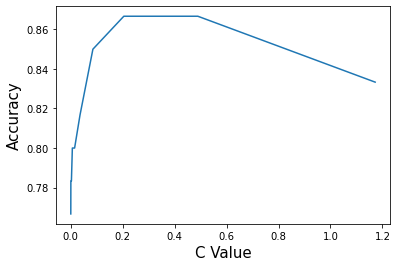

In [52]:
plt.plot(c_list[6:17], class_acc[6:17]) #Vizualization of C values 
plt.xlabel("C Value", fontsize="15")
plt.ylabel("Accuracy", fontsize="15")

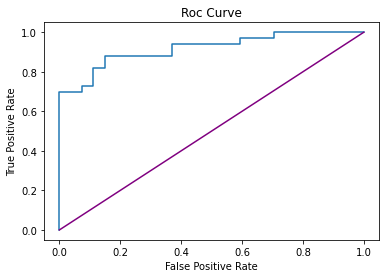

In [53]:
# Here we quantify the performace of the Classifier using Roc
y_pred_prob = log_reg.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_prob)

# We plot the Roc curve
fig, ax = plt.subplots()
ax.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Roc Curve")
line = mlines.Line2D([0, 1], [0, 1], color='purple', label='Chance Level') #chance Level
ax.add_line(line)
plt.show()

#### I've used the ROC curve to diagnost the ability of the logistic regression which varies the threshold and plots  the true positive rate (TPR) against the false positive rate(FPR). Area under the ROC Curve(AUC) provides an aggregate measure of performance across all possible classification thresholds

#### In this example the AUC tells us clearly that our Classifier is better than the Chance-Level.

---

#### 4.5

Feature: 0, Score:-0.016373379372160927 
Feature: 1, Score:0.09738459106948397 
Feature: 2, Score:0.0569470606245295 
Feature: 3, Score:-0.4396372411090894 
Feature: 4, Score:-0.061563105849919565 
Feature: 5, Score:-0.6745075516331578 
Feature: 6, Score:0.1804342396744021 
Feature: 7, Score:-0.07821868590645946 
Feature: 8, Score:-0.07917862937408462 
Feature: 9, Score:-0.16295539034912299 
Feature: 10, Score:0.15969842522919755 
Feature: 11, Score:-0.014604481821294308 
Feature: 12, Score:-0.14080664183657382 
Feature: 13, Score:0.14080664183657388 
Feature: 14, Score:-0.03888424912433524 
Feature: 15, Score:0.04597497956868251 
Feature: 16, Score:-0.041019145056839255 
Feature: 17, Score:-0.14692398924379374 
Feature: 18, Score:0.35117146785484704 
Feature: 19, Score:0.04829210323030979 
Feature: 20, Score:0.3783060056104299 
Feature: 21, Score:0.8278874013142811 
Feature: 22, Score:-0.23580100728931258 
Feature: 23, Score:0.052699137349822754 
Feature: 24, Score:-0.0845791649556922

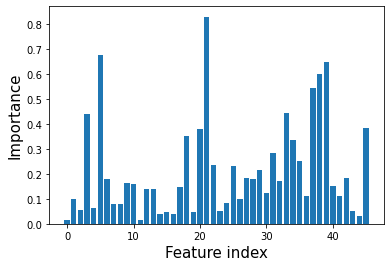

In [54]:
#Values can differ here with respect to hyperparameter selection, data splitting etc
model= LogisticRegression(random_state=10, solver = 'lbfgs',max_iter=10000, C=0.20433597178569396) # doinf the logistic regression with the optimaized C
model.fit(X_train, y_train)
imp = model.coef_[0]
for a,b in enumerate(imp):
    print('Feature: {}, Score:{} '.format (a,b))
# plot feature importance
plt.xlabel("Feature index", fontsize="15")
plt.ylabel("Importance", fontsize="15")
plt.bar([abs(x) for x in range(len(imp))], abs(imp))
plt.show()

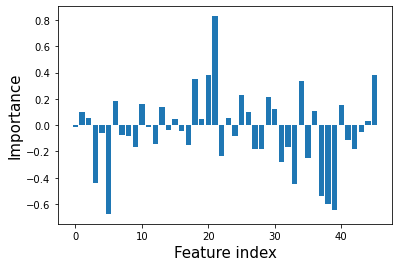

In [55]:
plt.xlabel("Feature index", fontsize="15")
plt.ylabel("Importance", fontsize="15")
plt.bar([abs(x) for x in range(len(imp))], (imp))
plt.show()

#### Negative values have a large influence on the non-conservative classification and positive values to conservative classification

In [56]:
feature_importance=pd.DataFrame({'feature':list(col),'feature_importance':[abs(i) for i in model.coef_[0]]})
feature_importance
feature_importance2=pd.DataFrame({'feature':list(col),'feature_importance':[i for i in model.coef_[0]]})
feature_importance2.head()

,feature,feature_importance
0,Population,-0.016373
1,Deutsche,0.097385
2,Auslander,0.056947
3,Density,-0.439637
4,Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 ...,-0.061563


In [57]:
f_im = feature_importance.sort_values(by=['feature_importance'], ascending=False)
f_im=f_im.iloc[:10,:] #selecting the top 10 feature
new_col=f_im['feature'].values 
X_t=X_t[new_col] #dataframe only withs this feature

#### 4.6

In [58]:
X_t.head()

,Unternehmensregister 2018 - Handwerksunternehmen (je 1000 EW),Zu- (+) bzw. Abnahme (-) der Bevölkerung 2019 - Wanderungssaldo (je 1000 EW),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - nicht erwerbsfähige Hilfebedürftige (%),Empfänger/-innen von Leistungen nach SGB II Oktober 2020 - insgesamt (je 1000 EW),"Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Übrige Dienstleister und ""ohne Angabe"" (%)","Sozialversicherungspflichtig Beschäftigte am 30.06.2020 - Land- und Forstwirtschaft, Fischerei (%)",Density,Arbeitslosenquote Februar 2021 - 55 bis 64 Jahre,Unternehmensregister 2018 - Unternehmen insgesamt (je 1000 EW),PKW-Bestand am 01.01.2020 - PKW insgesamt (je 1000 EW)
0,0.060435,2.047485,-0.212389,0.280072,1.479638,0.852549,-0.519516,0.424209,-0.089703,0.168999
1,1.342436,1.610669,-0.212389,-0.235288,0.733707,2.034688,-0.554119,0.216872,2.043004,0.496795
2,0.060435,0.263819,-0.136968,0.099551,0.603169,2.249622,-0.537048,-0.197802,-0.230942,0.468798
3,-0.061660,1.719873,1.107474,-0.418721,0.957486,1.819754,-0.533159,-0.819814,-0.527544,0.657777
4,-1.526804,-2.065868,0.051584,1.689305,1.889900,-0.759459,0.628731,0.838883,-0.894765,-1.310166


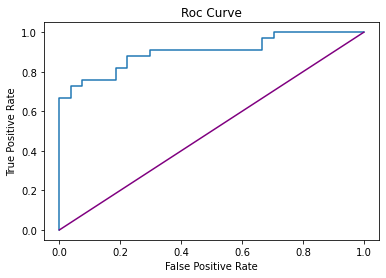

In [59]:
X_train,X_test,y_train,y_test= train_test_split(X_t, y1, train_size = 0.8, test_size=0.2, random_state=15) 
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs',max_iter=10000) 
log_reg.fit(X_train, y_train) #performing a logistic regression on the train data(fitting it)
# Here we quantify the performace of the Classifier using Roc
y_pred_prob = log_reg.predict_proba(X_test)[::,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_prob)

# We plot the Roc curve
fig, ax = plt.subplots()
ax.plot(fpr1,tpr1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("Roc Curve")
line = mlines.Line2D([0, 1], [0, 1], color='purple', label='Chance Level') #chance Level
ax.add_line(line)
plt.show()

#### Here we can see that the AUC of this Roc Curve is smaller in comparison to the one done before, when we had a larger amount of data to work with. Another difference was that in the first case we also had a better proportion true positive/False positive than here.

#### 4.7

#### We have seen in the last inspection that by reducing the dataset size, then the performance of the classification is not that good anymore. If we were to analyse/classify smaller datasets, by reducing the number of political parties that we observe, with logistic regression, then the chance of overfitting will increase as well. 

## Quellen
- Statistics for the Life Sciences- Myra Samuels-chi squared chapter
- Tutorium 8,5
- Slides aus Vorlesung Data Science 1, 7
- https://en.wikipedia.org/wiki/Receiver_operating_characteristic

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://seaborn.pydata.org/tutorial.html
- https://numpy.org/doc
- https://pandas.pydata.org/docs/reference 
- https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html 
- https://www.kaggle.com/prashant111/logistic-regression-classifier-tutorial
- https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html